

# **Transformations - Translations and Rotations**

In this lesson we'll learn to:
1. Perform Image Translations
2. Rotations with getRotationMatrix2D
3. Rotations with Transpose
4. Flipping Images

In [4]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()



### **Translations**

This an affine transform that simply shifts the position of an image. (left or right).

We use cv2.warpAffine to implement these transformations.

```cv2.warpAffine(image, T, (width, height))```

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/warp.png)

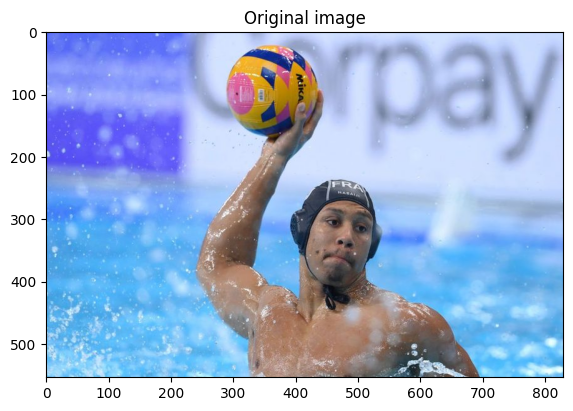

Height: 554, Width: 830
Height quarter: 138.5, Width quarter: 207.5
Translation matrix:
 [[  1.    0.  207.5]
 [  0.    1.  138.5]]


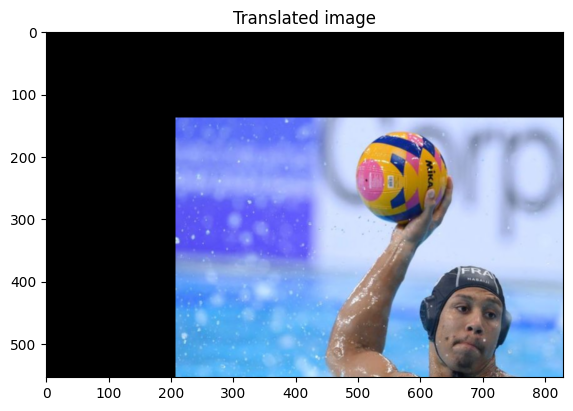

In [17]:
image= cv2.imread("images/volleyball.jpg")
imshow('Original image', image)

height, width= image.shape[:2]
print(f'Height: {height}, Width: {width}')

# We shift it by quarter of the height and width
quarter_height, quarter_width= height/4, width/4
print(f'Height quarter: {quarter_height}, Width quarter: {quarter_width}')

# Our Translation
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T= np.float32([[1,0,quarter_width],[0,1,quarter_height]])
print(f'Translation matrix:\n {T}')

# We use warpAffine to transform the image using the T matrix
image_translation= cv2.warpAffine(image, T, (width,height))
imshow('Translated image', image_translation)

### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)


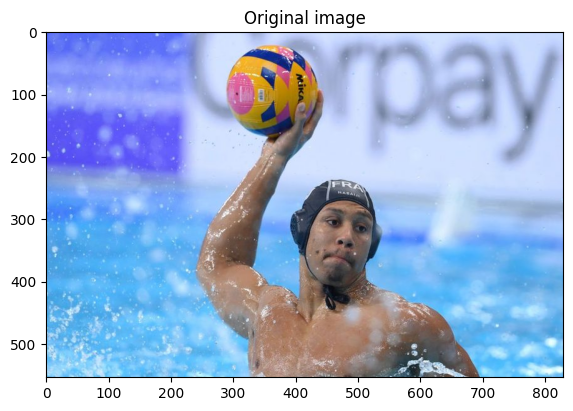

Rotation matrix:
 [[ 6.123234e-17  1.000000e+00  1.380000e+02]
 [-1.000000e+00  6.123234e-17  6.920000e+02]]


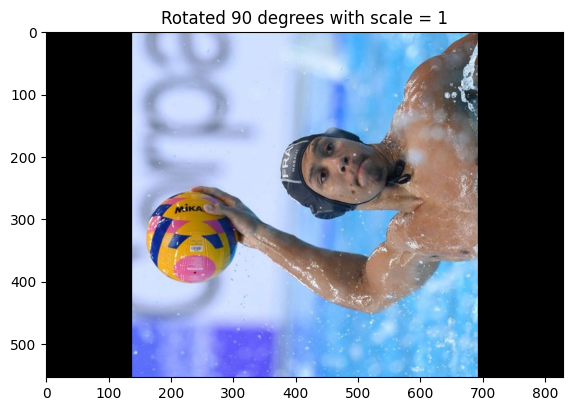

Rotation matrix:
 [[ 3.061617e-17  5.000000e-01  2.765000e+02]
 [-5.000000e-01  3.061617e-17  4.845000e+02]]


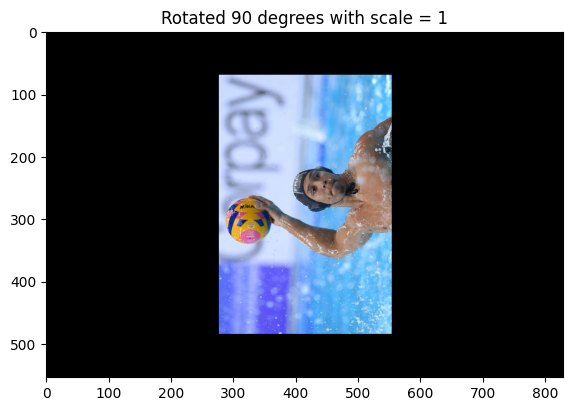

In [43]:
image= cv2.imread("images/volleyball.jpg")
imshow('Original image', image)

height, width= image.shape[:2]
#print(f'Height: {height}, Width: {width}')

# Divide by two to rotate the image around its centre
rotation_matrix= cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
print("Rotation matrix:\n",rotation_matrix)

# Input our image, the rotation matrix and our desired final width and height
rotated_image= cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 1", rotated_image)

# Rotate with scale 0.5
rotation_matrix= cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print("Rotation matrix:\n",rotation_matrix)

rotated_image= cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 1", rotated_image)

Notice all the black space surrounding the image.

We could now crop the image as we can calculate it's new size (we haven't learned cropping yet!).

### **Rotations with cv2.transpose** (less flexible)




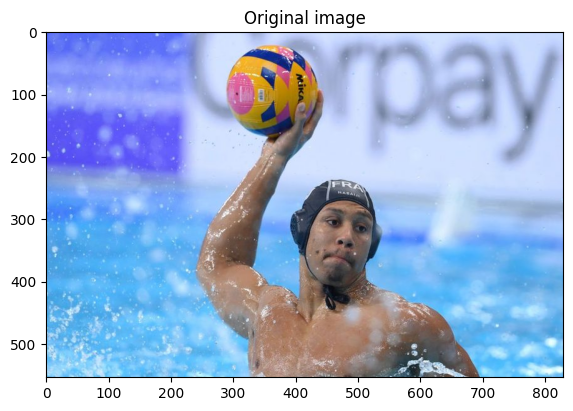

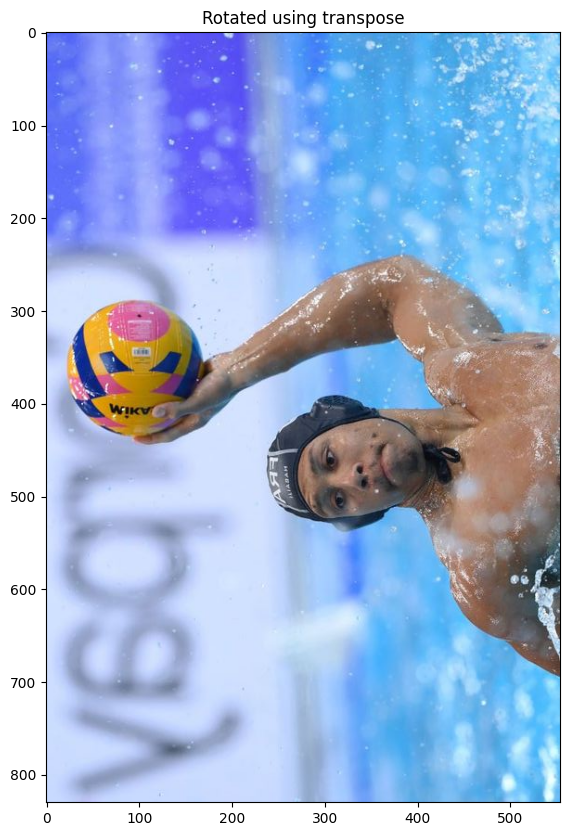

In [48]:
rotated_image= cv2.transpose(image)

imshow("Original image", image)
imshow("Rotated using transpose", rotated_image)

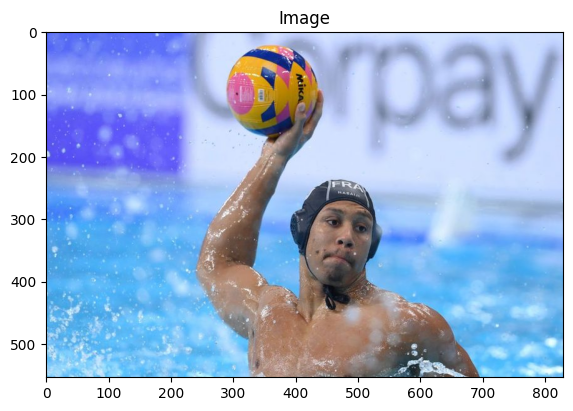

In [49]:
rotated_image= cv2.transpose(image)
rotated_image= cv2.transpose(rotated_image)
imshow(image= rotated_image)

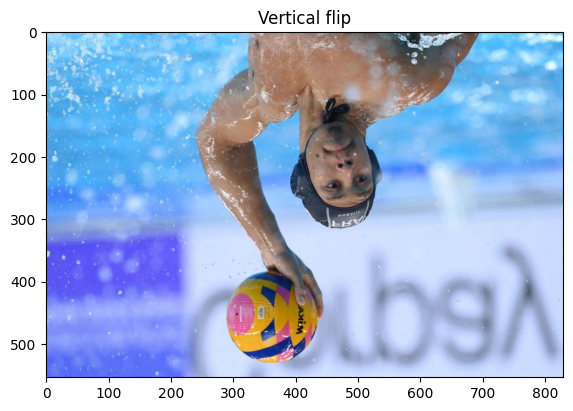

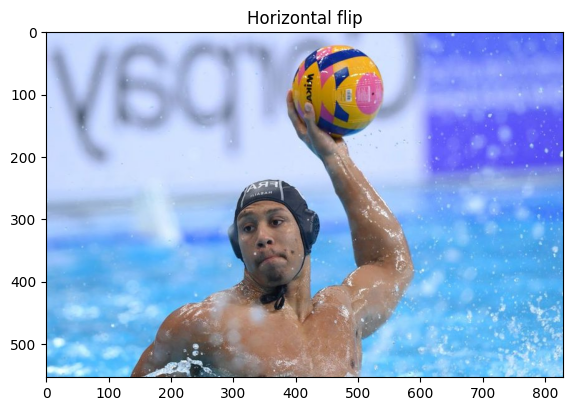

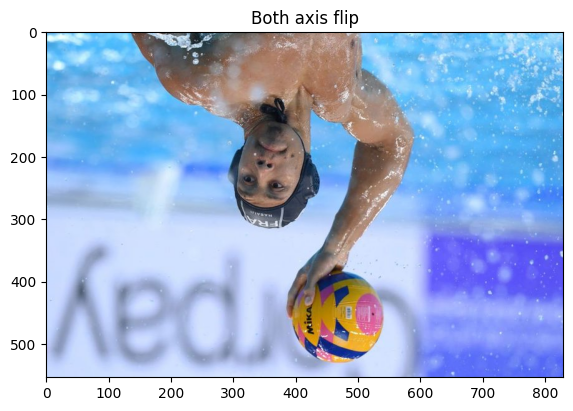

In [54]:
# Horizontal flip
flipped_image= cv2.flip(image, 0)
imshow('Vertical flip', flipped_image)

flipped_image= cv2.flip(image, 1)
imshow('Horizontal flip', flipped_image)

flipped_image= cv2.flip(image, -1)
imshow('Both axis flip', flipped_image)